In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [81]:
parsed = '/projects/ps-yeolab3/bay001/rep_element_reference/sorted_perl5.22.0/ecliprepmap-0.0.2/RBFOX2/results/combined.parsed'

def read_parsed(fn):
    df = pd.read_table(fn, comment='#', names=[
        'total_or_element','element','read_num','percentage','annotation','gene'
    ])
    total_df = df[df['total_or_element']=='TOTAL'][['element','read_num','percentage']]
    element_df = df[df['total_or_element']=='ELEMENT'][['element','read_num','percentage']]
    return total_df, element_df

def plot(fn, ax=None, title="Top 25 unique/repetitive elements mapped", num_elements=25):
    if ax is None:
        ax = plt.gca()
    
    ax2 = ax.twinx()
    total_df, _ = read_parsed(fn)
    total_df.sort_values(['read_num'], ascending=False, inplace=True)
    total_df.set_index('element')['read_num'][:num_elements].plot(kind='bar', ax=ax)
    total_df.set_index('element')['percentage'][:num_elements].plot(kind='bar', ax=ax2)
    
    ax2.set_ylabel('Percent of total reads')
    ax.set_ylabel('Total read number')
    ax.set_title(title)
    return ax

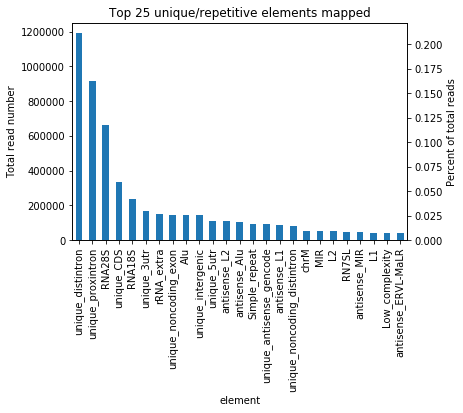

In [82]:
fig, ax = plt.subplots()

plot(parsed, ax=ax)